In [31]:
# importar os pacotes necessários
import re
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
#Lendo o arquivo do curriculo
tex = open('new15.txt',"r")
tex2 = tex.read()

In [33]:
stopwords= set(STOPWORDS)

words = []
with open("stopwords1.txt", 'r') as f:
    [words.append(word) for line in f for word in line.split()]

stopwords_new = stopwords.union(words)

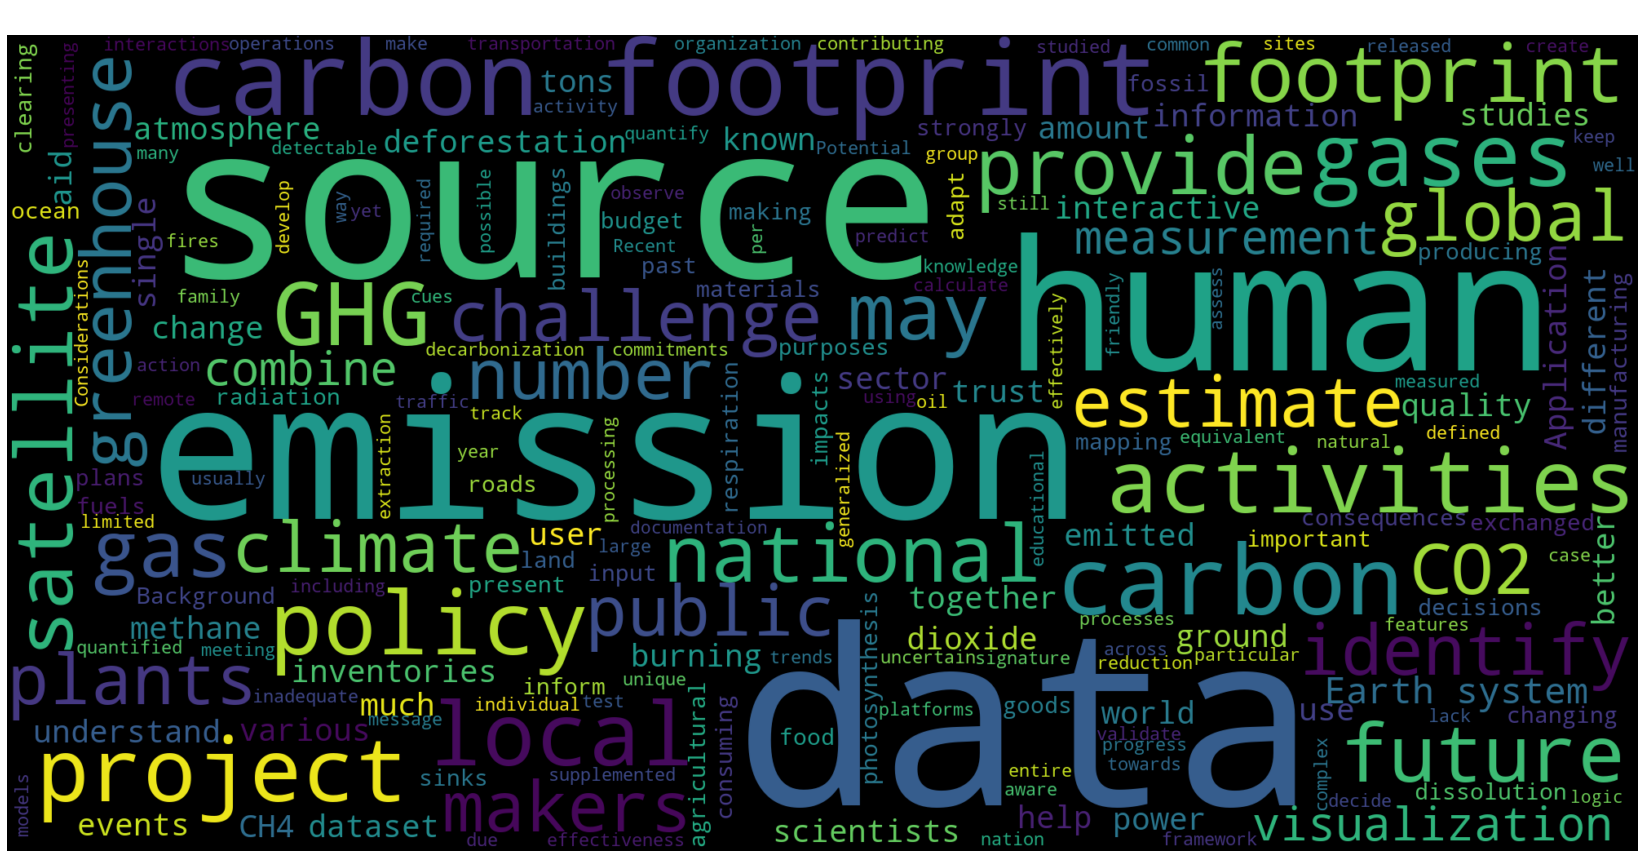

In [35]:
plt.figure(figsize=(30,15))
wc = WordCloud(min_font_size=1, 
               max_font_size=300,
               background_color='black', 
               mode="RGB",
               stopwords=stopwords_new,
               width=2000, 
               height=1000,
               #mask=cur_mask,
               normalize_plurals= True).generate(tex2)

plt.title("EARTH DAY", fontsize=30, color="white")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [37]:
i = Image.open('/content/001.png')

In [38]:
i = np.asarray(i, dtype=np.float32)/255

In [39]:
plt.figure(figsize=(30,30))
im = plt.imshow(i, aspect='auto')
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [40]:
r = Image.open('/content/002.png')


In [41]:
r = np.asarray(r, dtype=np.float32)/255

In [42]:
plt.figure(figsize=(30,30))
im = plt.imshow(r, aspect='auto')
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [43]:
pip install folium

In [44]:
import folium 

In [45]:
mapa = folium.Map(location=[-23.1791,-45.8872])

In [46]:
mapa

In [47]:
from folium import plugins

In [48]:
df = pd.read_csv('/content/MODIS_C6_South_America_24h.csv')
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,-9.774,-35.884,308.8,3.1,1.7,2020-10-02,25,T,76,6.0NRT,292.3,42.8,N
1,-9.775,-35.890,310.0,3.1,1.7,2020-10-02,25,T,79,6.0NRT,292.3,48.0,N
2,-6.900,-37.459,314.7,3.7,1.8,2020-10-02,25,T,90,6.0NRT,296.2,71.4,N
3,-6.909,-37.464,306.8,3.7,1.8,2020-10-02,25,T,69,6.0NRT,296.1,31.2,N
4,-6.893,-37.467,307.5,3.7,1.8,2020-10-02,25,T,72,6.0NRT,295.9,34.3,N


In [49]:
df.shape

(17487, 13)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17487 entries, 0 to 17486
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    17487 non-null  float64
 1   longitude   17487 non-null  float64
 2   brightness  17487 non-null  float64
 3   scan        17487 non-null  float64
 4   track       17487 non-null  float64
 5   acq_date    17487 non-null  object 
 6   acq_time    17487 non-null  int64  
 7   satellite   17487 non-null  object 
 8   confidence  17487 non-null  int64  
 9   version     17487 non-null  object 
 10  bright_t31  17487 non-null  float64
 11  frp         17487 non-null  float64
 12  daynight    17487 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 1.7+ MB


In [51]:
coordenadas = []
for lat, lng in zip(df.latitude.values[:17000],df.longitude.values[:17000]):
  coordenadas.append([lat,lng])

In [52]:
mapa = folium.Map(location=[-23.1791,-45.8872],zoom_start=5,tiles='Stamen Terrain')

In [53]:
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

In [29]:
df.acq_date.value_counts()

2020-10-02    9921
2020-10-03    7566
Name: acq_date, dtype: int64

In [30]:
#https://firms.modaps.eosdis.nasa.gov/data/active_fire/c6/csv/MODIS_C6_South_Amer